# Rotten Tomatoes Score Analysis

## Score By Streaming Service

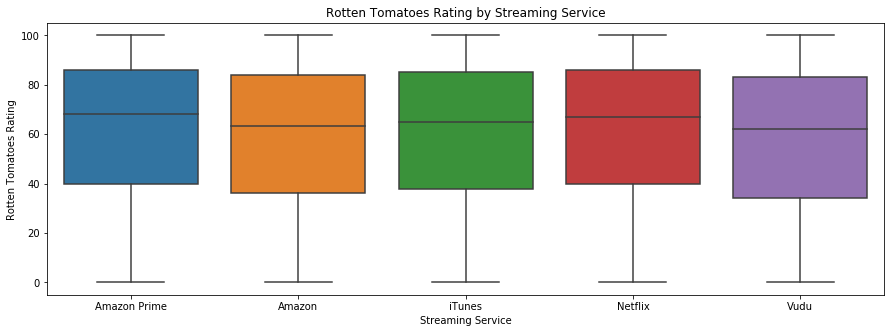

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Read csv files into pandas dataframes
amazon_prime = pd.read_csv("./scores/amazon_prime.csv", header=None, names=["amazon_prime"])
amazon = pd.read_csv("./scores/amazon.csv", header=None, names=["amazon"])
itunes = pd.read_csv("./scores/itunes.csv", header=None, names=["itunes"])
netflix = pd.read_csv("./scores/netflix_iw.csv", header=None, names=["netflix"])
vudu = pd.read_csv("./scores/vudu.csv", header=None, names=["vudu"])

# Make boxplot of ratings by streaming service
fig = plt.figure(figsize=(15, 5))
ax = sns.boxplot(data=[amazon_prime, amazon, itunes, netflix, vudu])
ax.set(title="Rotten Tomatoes Rating by Streaming Service", xlabel='Streaming Service', ylabel='Rotten Tomatoes Rating')
ax.set_xticklabels(["Amazon Prime", "Amazon", "iTunes", "Netflix", "Vudu"])
ax

In [42]:
dateparse = lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S%z')
all_scores = pd.read_csv("./scores/all_scores.csv")
all_scores['release_date'] = all_scores['release_date'].apply(lambda x: dt.datetime.strptime(x[:-6],'%Y-%m-%d %H:%M:%S'))
all_scores

,title,tomato_score,audience_score,release_date,runtime,rating,genre,cast,studio,director
0,Many Adventures of Winnie the Pooh (1977),100,88,1977-03-10 16:00:00,74,G,"['Animation', 'Comedy', 'Kids & Family', 'Musi...","['Sterling Holloway', 'Paul Winchell', 'Junius...",Walt Disney Productions,"['Wolfgang Reitherman', 'John Lounsbery']"
1,Toy Story 2 (1999),100,86,1999-11-23 16:00:00,92,G,"['Animation', 'Comedy', 'Kids & Family']","['Tim Allen', 'Joan Cusack', 'Kelsey Grammer',...",Buena Vista Pictures,['John Lasseter']
2,The Odd Couple (1968),100,89,1967-12-31 16:00:00,105,PG,"['Classics', 'Comedy', 'Drama']","['Walter Matthau', 'Jack Lemmon', 'Monica Evan...",Paramount Home Video,['Gene Saks']
3,Old Yeller (1957),100,79,1957-12-24 16:00:00,84,G,"['Action & Adventure', 'Classics', 'Drama', 'K...","['Dorothy McGuire', 'Tommy Kirk', 'Kevin Corco...",Buena Vista Pictures,['Robert Stevenson']
4,On a Clear Day You Can See Forever (1970),100,75,1969-12-31 16:00:00,129,G,"['Classics', 'Comedy', 'Drama', 'Musical & Per...","['Barbra Streisand', 'Yves Montand', 'Bob Newh...",Paramount Pictures,['Vincente Minnelli']
...,...,...,...,...,...,...,...,...,...,...
15960,Deadline (2012),0,53,2012-04-12 17:00:00,95,PG-13,"['Drama', 'Mystery & Suspense']","['Steve Talley', 'Eric Roberts', 'Clay Brocker...",Independent Pictures,['Curt Hahn']
15961,Chroniques sexuelles d'une famille d'aujourd'h...,0,27,2012-05-31 17:00:00,87,NR,['Comedy'],"['Mathias Melloul', 'Valérie Maës', 'Stephan H...",IFC Midnight,"['Jean-Marc Barr', 'Pascal Arnold']"
15962,The Snow Queen (2013),0,66,2013-10-10 17:00:00,80,PG,"['Animation', 'Art House & International', 'Ki...","['Doug Erholtz', 'Cindy Robinson', 'Wendee Lee...",Vertical Entertainment,"['Vlad Barbe', 'Maksim Sveshnikov', 'Vladlen B..."
15963,General Education (2012),0,38,2012-08-23 17:00:00,85,PG-13,['Comedy'],"['Chris Sheffield', 'Janeane Garofalo', 'Larry...",Well Go USA,['Tom Morris']


In [43]:
# Clean ratings
# ['G' 'PG' 'PG-13 ' 'PG ' 'NR' 'R' 'NR ' 'NC17 ' 'R ' 'PG-13' 'NC17' 'G ' 'PG-13 )' 'R )']
def real_rating(rating):
    if rating in ['G', 'G ']:
        return 'G'
    if rating in ['PG', 'PG ']:
        return 'PG'
    if rating in ['PG-13', 'PG-13 ', 'PG-13 )']:
        return 'PG-13'
    if rating in ['NR', 'NR ']:
        return 'NR'
    if rating in ['NC17 ', 'NC17']:
        return 'NC17'
    return 'R'

all_scores['real_rating'] = all_scores['rating'].apply(real_rating)
all_scores['real_rating'].unique()

array(['G', 'PG', 'PG-13', 'NR', 'R', 'NC17'], dtype=object)

## Scores by Runtime

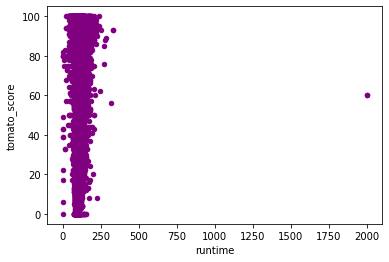

In [44]:
# Scatterplot of runtime vs scores
ax_rating = all_scores.plot.scatter(x='runtime', y='tomato_score', c='purple')

<Figure size 1080x360 with 0 Axes>

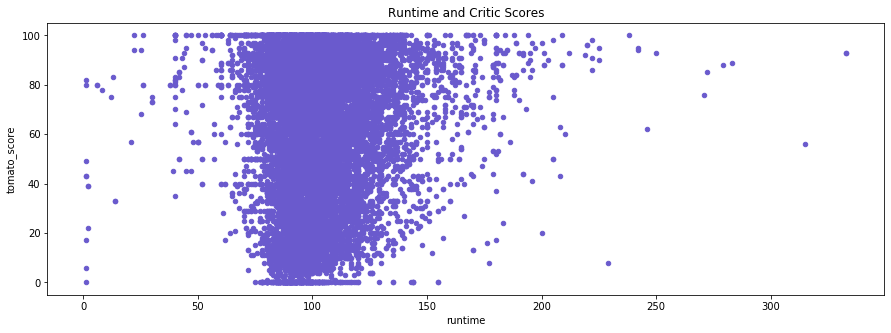

In [45]:
# Because there is an outlier, remove the outlier and remake plot
fig = plt.figure(figsize=(15,5))
trim_runtime_scores = all_scores[all_scores['runtime'] < 2000]
ax_rating_trim = trim_runtime_scores.plot.scatter(x='runtime', y='tomato_score', c='SlateBlue', figsize=(15, 5))
plt.title("Runtime and Critic Scores")
plt.show()

Text(0.5, 1.0, 'Distribution of Runtimes')

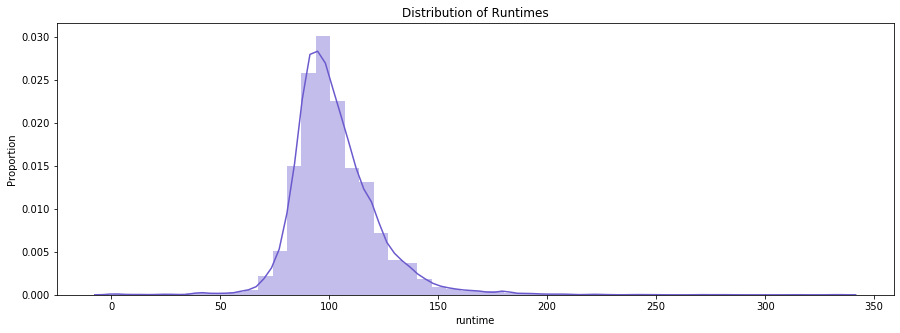

In [46]:
# Histogram of movie runtimes
fig = plt.figure(figsize=(15, 5))
trim_runtime_hist = sns.distplot(trim_runtime_scores['runtime'], color="SlateBlue")
# plt.yticks([])
plt.ylabel("Proportion")
plt.title("Distribution of Runtimes")

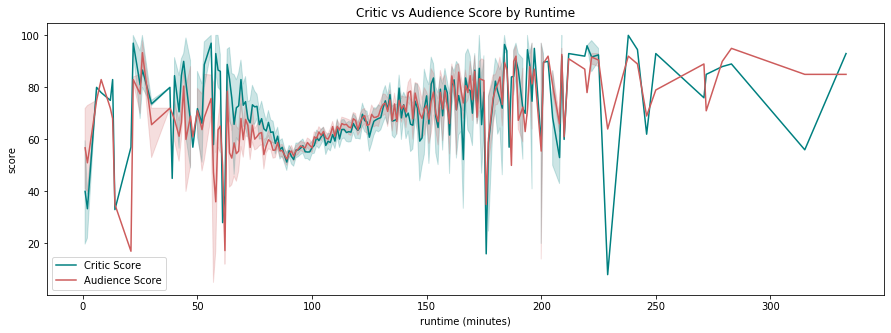

In [47]:
fig = plt.figure(figsize=(15,5))
tomato_runtime = sns.lineplot(x='runtime', y='tomato_score', data=trim_runtime_scores, label="Critic Score", sort=True, color="Teal")
audience_runtime = sns.lineplot(x='runtime', y='audience_score', data=trim_runtime_scores, label="Audience Score", sort=True, color="IndianRed")
plt.legend()
plt.xlabel("runtime (minutes)")
plt.ylabel("score")
plt.title("Critic vs Audience Score by Runtime")
plt.show()

## Scores vs Release Date

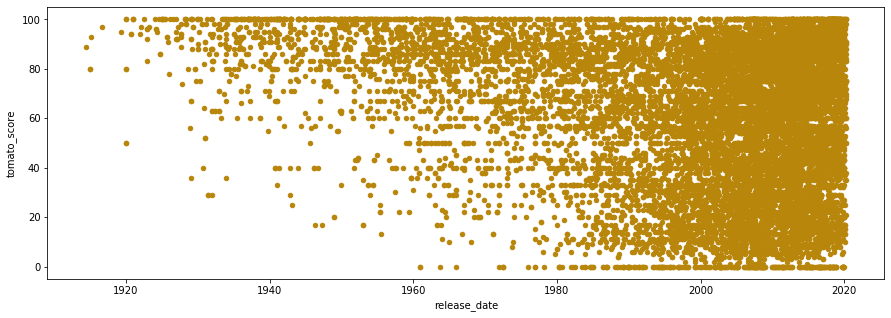

In [48]:
ax_release_scatter = all_scores.plot.scatter(x='release_date', y='tomato_score', c='DarkGoldenRod', figsize=(15, 5))

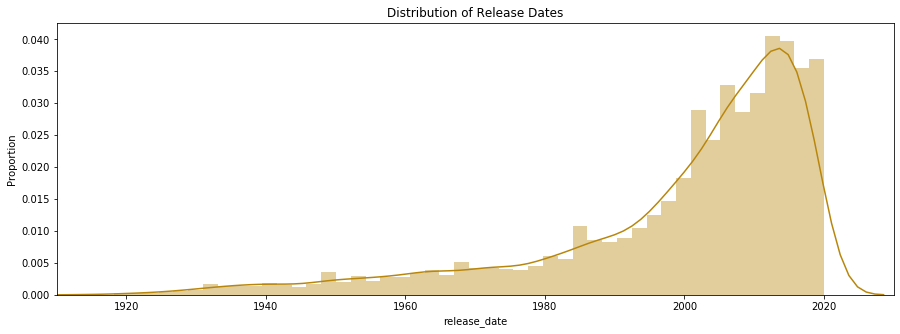

In [49]:
figure = plt.figure(figsize=(15, 5))
release_year = all_scores['release_date'].apply(lambda x : x.year)
release_distplot = sns.distplot(release_year, color="DarkGoldenRod")
plt.xlim(1910, 2030)
plt.title("Distribution of Release Dates")
plt.ylabel("Proportion")
plt.show()

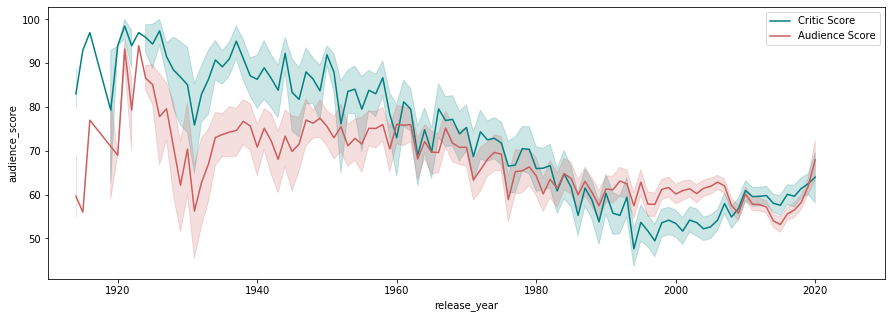

In [50]:
figure = plt.figure(figsize=(15, 5))
release_scores = all_scores[['tomato_score', 'audience_score']]
release_scores.insert(2, "release_year", release_year, True)
tomato_release = sns.lineplot(x='release_year', y='tomato_score', data=release_scores, label="Critic Score", sort=True, color="Teal")
audience_release = sns.lineplot(x='release_year', y='audience_score', data=release_scores, label="Audience Score", sort=True, color="IndianRed")
plt.xlim(1910, 2030)
plt.show()

## Critic Scores vs Audience Scores

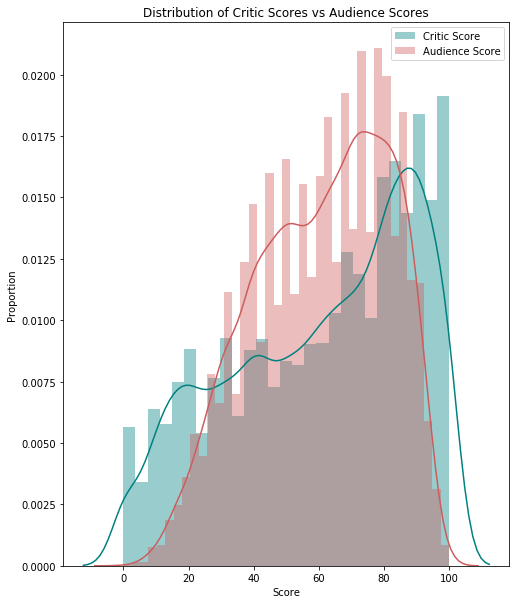

In [51]:
# ax_scores = all_scores.hist(column=['tomato_score', 'audience_score'], bins=20, color='Coral', grid=False, sharey=True, figsize=(15, 5))
fig = plt.figure(figsize=(8,10))
sns.distplot(all_scores['tomato_score'], hist=True, color='Teal', label="Critic Score")
sns.distplot(all_scores['audience_score'], hist=True, color='IndianRed', label="Audience Score")
plt.legend()
plt.ylabel("Proportion")
plt.xlabel("Score")
plt.title("Distribution of Critic Scores vs Audience Scores")
plt.show()

## Score by Genre

In [52]:
# Dataframes containing movies of given genres
action_df = all_scores[all_scores['genre'].str.contains('Action & Adventure', case=False)]
animation_df = all_scores[all_scores['genre'].str.contains('Animation', case=False)]
art_df = all_scores[all_scores['genre'].str.contains('Art House & International', case=False)]
classics_df = all_scores[all_scores['genre'].str.contains('Classics', case=False)]
comedy_df = all_scores[all_scores['genre'].str.contains('Comedy', case=False)]
doc_df = all_scores[all_scores['genre'].str.contains('Documentary', case=False)]
drama_df = all_scores[all_scores['genre'].str.contains('Drama', case=False)]
horror_df = all_scores[all_scores['genre'].str.contains('Horror', case=False)]
kids_df = all_scores[all_scores['genre'].str.contains('Kids & Family', case=False)]
thrill_df = all_scores[all_scores['genre'].str.contains('Mystery & Suspense', case=False)]
music_df = all_scores[all_scores['genre'].str.contains('Musical & Performing Arts', case=False)]
romance_df = all_scores[all_scores['genre'].str.contains('Romance', case=False)]
scifi_df = all_scores[all_scores['genre'].str.contains('Science Fiction & Fantasy', case=False)]
west_df = all_scores[all_scores['genre'].str.contains('Western', case=False)]

# Genre Histogram comapring critic and audience scores
# genre_ax = drama_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))

# fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14)= plt.subplots(14, 1)
# fig = plt.figure()
#ax1 = action_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax2 = animation_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax3 = art_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax4 = classics_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax5 = comedy_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax6 = doc_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax7 = drama_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax8 = horror_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax9 = kids_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax10 = thrill_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax11 = music_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax12 = romance_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax13 = scifi_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))
#ax14 = west_df.hist(column=['tomato_score', 'audience_score'], bins=20, color='LightSeaGreen', grid=False, sharey=True, figsize=(15, 5))

In [53]:
# Genre List, by levih2
genres = set()
for index,movie in all_scores.iterrows():
    firstApost = -1
    secondApost = 0
    while secondApost != -1:
        firstApost = movie.genre.find('\'',firstApost+1)
        secondApost = movie.genre.find('\'',firstApost+1)
        thisGenre = movie.genre[firstApost+1:secondApost]
        if(secondApost != -1 and not(thisGenre in genres)):
            genres.add(thisGenre)
            
#There was a genre that was just a comma so i removed it
genres.remove(', ')
print (genres)

{'Western', 'Classics', 'Kids & Family', 'Television', 'Science Fiction & Fantasy', 'Action & Adventure', 'Musical & Performing Arts', 'Art House & International', 'Animation', 'Horror', 'Anime & Manga', 'Special Interest', 'Faith & Spirituality', 'Documentary', 'Sports & Fitness', 'Gay & Lesbian', 'Drama', 'Cult Movies', 'Romance', 'Mystery & Suspense', 'Comedy'}


In [54]:
# Create dictionary of genres and dataframes with corresponding movies
genre_dict = dict()
for genre in genres:
    genre_dict[genre] = action_df = all_scores[all_scores['genre'].str.contains(genre, case=False)]

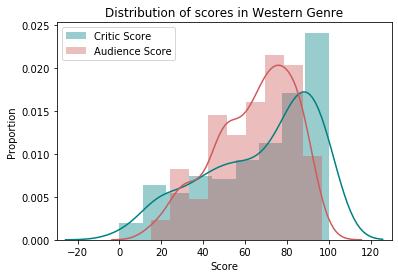

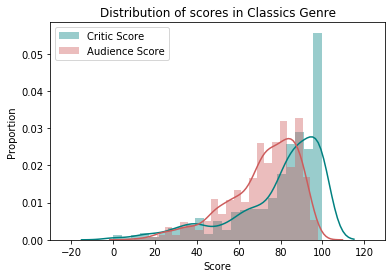

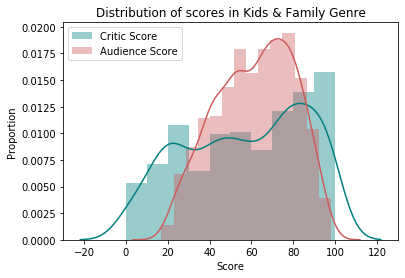

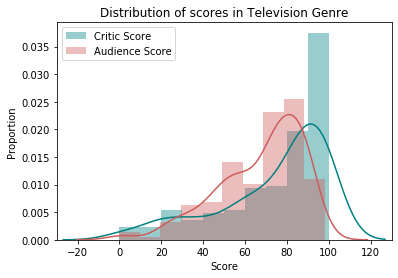

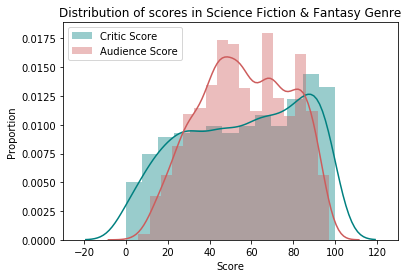

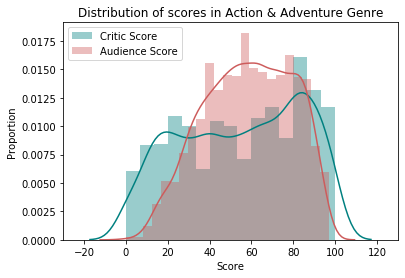

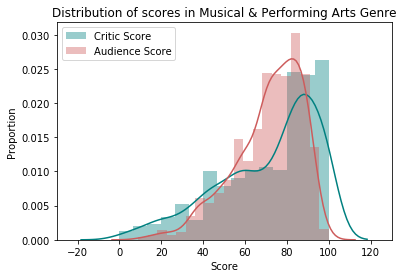

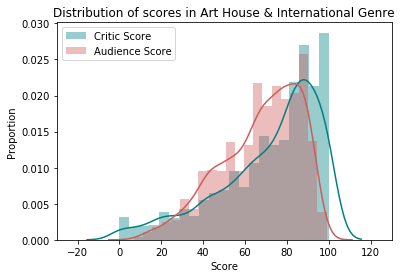

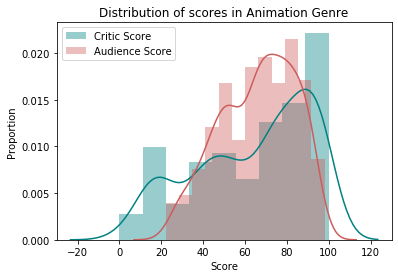

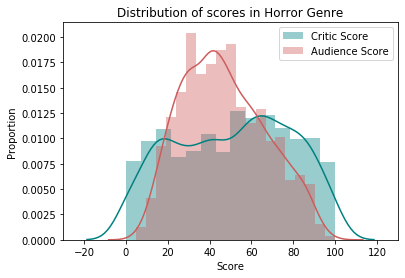

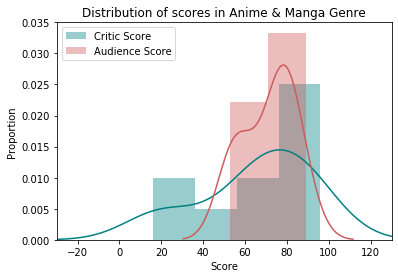

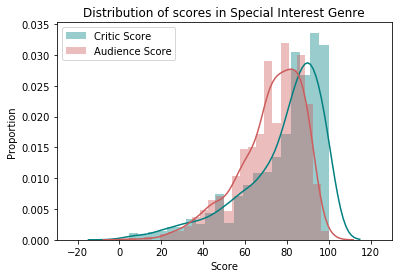

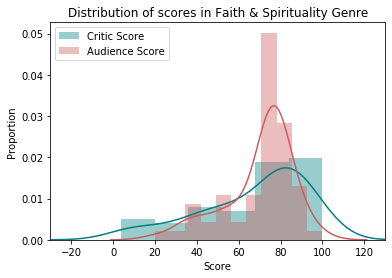

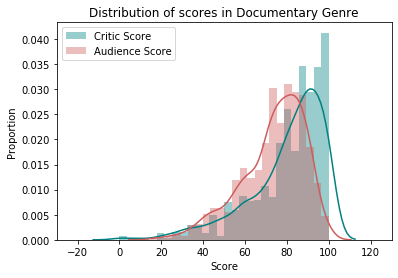

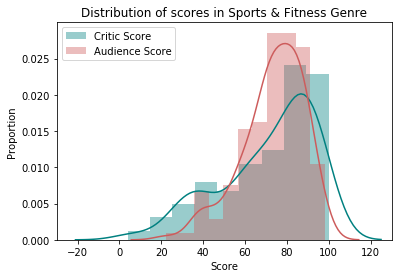

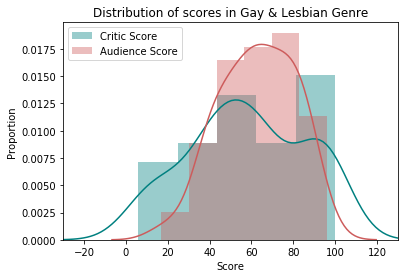

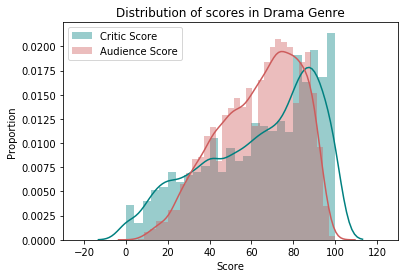

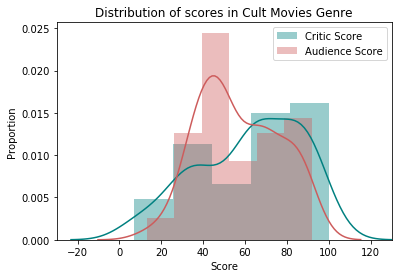

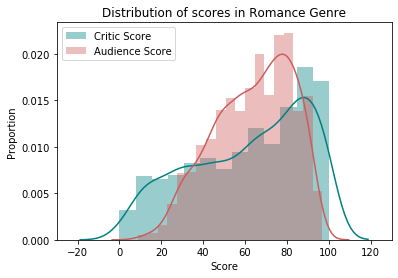

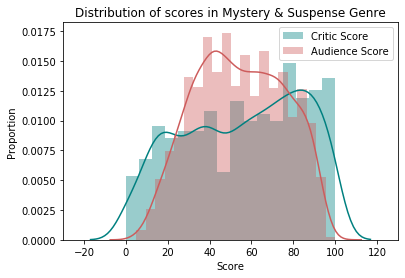

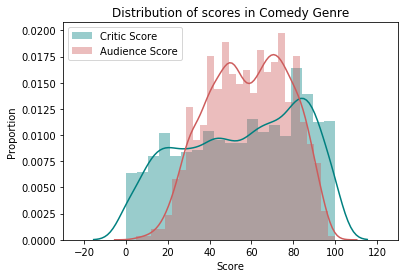

In [55]:
# Generate a distplot for each genre
for genre in genre_dict:
    # genre_dict[genre]
    sns.distplot(genre_dict[genre]['tomato_score'], hist=True, color='Teal', label="Critic Score")
    sns.distplot(genre_dict[genre]['audience_score'], hist=True, color='IndianRed', label="Audience Score")
    plt.legend()
    plt.title("Distribution of scores in " + genre + " Genre")
    plt.ylabel("Proportion")
    plt.xlabel("Score")
    plt.xlim(-30, 130)
    plt.show()

## Critic Scores vs Audience Scores by MPAA Ratings

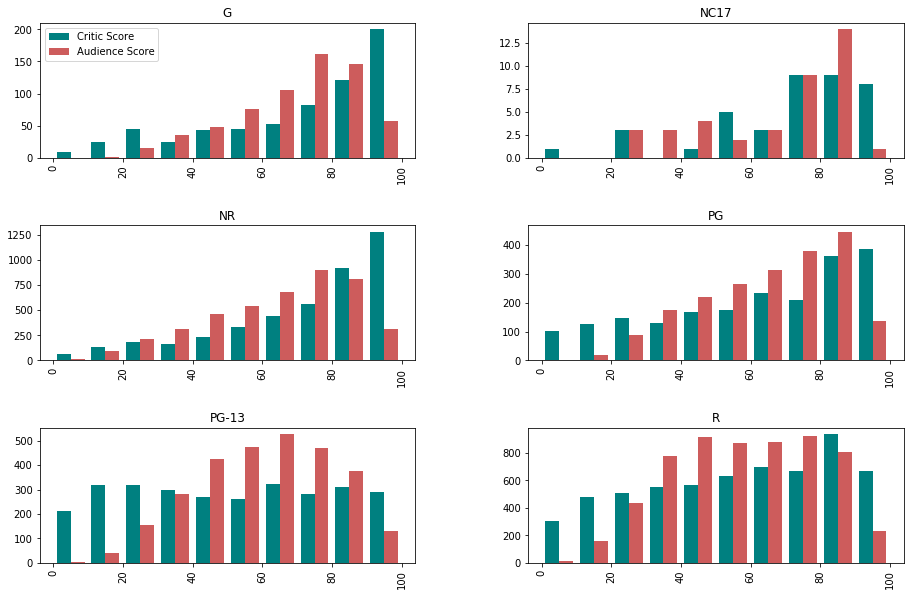

In [56]:
rating_scores = all_scores.copy()
rating_scores = rating_scores.drop(['release_date', 'runtime'], axis=1)
rating_ax = rating_scores.hist(by=rating_scores['real_rating'], color=['Teal', 'IndianRed'], figsize=(15,10), label=['Critic Score', 'Audience Score'], range=(0,100))

# Add legend
rating_ax[0][0].legend()
plt.show()

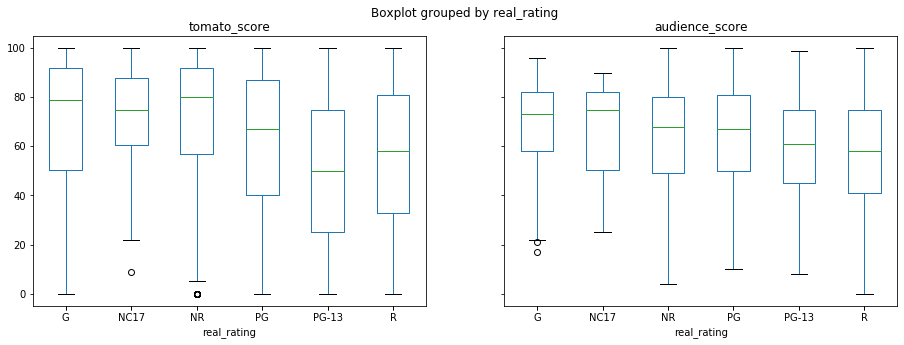

In [57]:
ax_rating_box = all_scores.boxplot(by='real_rating', column=['tomato_score', 'audience_score'], figsize=(15, 5), grid=False)

<Figure size 432x288 with 0 Axes>

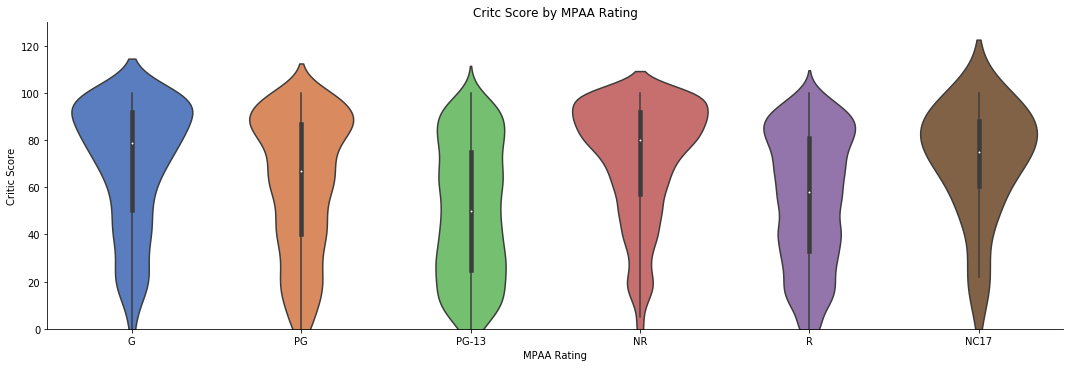

In [58]:
fig = plt.figure()
mpaaax = sns.catplot(x='real_rating', y='tomato_score', kind="violin", data=all_scores, height=5, aspect=3, palette='muted', ylim=(0,100))
mpaaax.set(ylim=(0,130))
plt.title("Critc Score by MPAA Rating")
plt.xlabel("MPAA Rating")
plt.ylabel("Critic Score")
plt.show()

<Figure size 432x288 with 0 Axes>

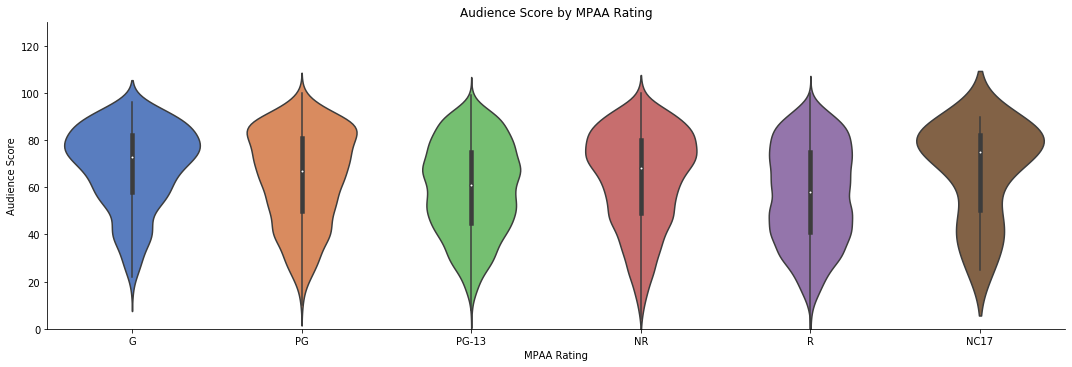

In [59]:
fig = plt.figure()
mpaaax = sns.catplot(x='real_rating', y='audience_score', kind="violin", data=all_scores, height=5, aspect=3, palette='muted', fontsize=20)
mpaaax.set(ylim=(0,130))
plt.title("Audience Score by MPAA Rating")
plt.xlabel("MPAA Rating")
plt.ylabel("Audience Score")
plt.show()

## Scratch Calculations                                                                                                                                                                                                                                                                                             

In [60]:
all_scores['tomato_score'].describe()

count    15965.000000
mean        60.481804
std         28.368188
min          0.000000
25%         38.000000
50%         66.000000
75%         85.000000
max        100.000000
Name: tomato_score, dtype: float64

In [61]:
all_scores['audience_score'].describe()

count    15965.000000
mean        60.787786
std         20.379550
min          0.000000
25%         45.000000
50%         63.000000
75%         78.000000
max        100.000000
Name: audience_score, dtype: float64